# Imports

In [ ]:
from google.colab import drive
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')
root_path = '<path to the root directory>'

Mounted at /content/drive


# Data Loading

In this section we are going to load the 3 datasets that we have been given to work on them.

In [2]:
# loading the dataset that contains the cods of the airports
Airport_codes_df = pd.read_csv(f'{root_path}/Airport_Codes.csv')

# loading the dataset that contains the flights
Flights_df = pd.read_csv(f'{root_path}/Flights.csv')

# loading the dataset that contains the tickets
Tickets_df = pd.read_csv(f'{root_path}/Tickets.csv')

/tmp/ipython-input-2-591924535.py:5: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  Flights_df = pd.read_csv(f'{root_path}/Flights.csv')


# Explanatory Data Analysis + pre-processing

In this section we are going to understand the data a little bit better.

## Airport_codes.csv

Let's take a look at the dataset

In [3]:
# taking a look at the first 5 records in the dataset
Airport_codes_df.head()

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.0,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.0,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.0,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.0,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,Newport,NaN,"-91.254898, 35.6087"


We were asked to only consider the 'medium' and 'large' __US__ airports in our analysis. So let's filter only those airports from the dataset.

In [4]:
# filter the airports information that are only medium and large
ML_US_airports_df = Airport_codes_df[(Airport_codes_df['TYPE'].isin(['medium_airport', 'large_airport'])) & (Airport_codes_df['ISO_COUNTRY'] == 'US')]
ML_US_airports_df

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
6194,medium_airport,Aleknagik / New Airport,66.0,NaN,US,Aleknagik,WKK,"-158.617996216, 59.2826004028"
25963,medium_airport,South Alabama Regional At Bill Benton Field Ai...,310.0,NaN,US,Andalusia/Opp,NaN,"-86.393799, 31.3088"
26143,medium_airport,Lehigh Valley International Airport,393.0,NaN,US,Allentown,ABE,"-75.44080352783203, 40.652099609375"
26144,medium_airport,Abilene Regional Airport,1791.0,NaN,US,Abilene,ABI,"-99.68190002440001, 32.4113006592"
26145,large_airport,Albuquerque International Sunport,5355.0,NaN,US,Albuquerque,ABQ,"-106.609001, 35.040199"
...,...,...,...,...,...,...,...,...
49351,medium_airport,Jim's Private Airport,890.0,NaN,US,Conyers,NaN,"-84.14440155, 33.59790039"
49519,medium_airport,Yuma Auxiliary AAF #2,NaN,NaN,US,NaN,NaN,"-114.511383, 32.548984"
49569,large_airport,atl,NaN,NaN,US,NaN,NaN,"-84.375, 33.137551"
49837,medium_airport,Williston Basin International Airport (U.C.),2344.0,NaN,US,Williston,NaN,"-103.748797, 48.258387"


In [5]:
# taking a look at the number of the records and features in this dataset
data_shape = ML_US_airports_df.shape

print('#records = ', data_shape[0])
print('#features = ', data_shape[1])

#records =  858
#features =  8


We will remove any possible duplicated records from the dataset

In [6]:
# check how many records are duplicated in the dataset
print(f'There are {ML_US_airports_df.duplicated().sum()} duplicated records')

print('-' * 30)
print('After dropping the duplicates: ')

# dropping the duplicated records from the dataset
ML_US_airports_df = ML_US_airports_df.drop_duplicates()

# get the shape of the data again
data_shape = ML_US_airports_df.shape

print('#records = ', data_shape[0])
print('#features = ', data_shape[1])

There are 0 duplicated records
------------------------------
After dropping the duplicates: 
#records =  858
#features =  8


Then we will check if there is any missing values in the dataset or not

In [7]:
# taking a look if there is any missing values in the data
ML_US_airports_df.isnull().sum()

,0
TYPE,0
NAME,0
ELEVATION_FT,3
CONTINENT,858
ISO_COUNTRY,0
MUNICIPALITY,3
IATA_CODE,37
COORDINATES,0


We have checked the flights dataset before and the only way to have a consistent analysis we have to join the data based on the 'IATA_CODE' of the airports. So we will remove all of the records that are missing this value from our analysis.

In [8]:
# select only the records that their IATA_CODE is present
ML_US_airports_df = ML_US_airports_df[~ML_US_airports_df['IATA_CODE'].isnull()].reset_index(drop = True)

# get the shape of the data again
data_shape = ML_US_airports_df.shape

print('#records = ', data_shape[0])
print('#features = ', data_shape[1])

#records =  821
#features =  8


We can see there are lots of missing values in the dataset

In [9]:
# taking a look at the type of dta
ML_US_airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          821 non-null    object 
 1   NAME          821 non-null    object 
 2   ELEVATION_FT  821 non-null    float64
 3   CONTINENT     0 non-null      object 
 4   ISO_COUNTRY   821 non-null    object 
 5   MUNICIPALITY  821 non-null    object 
 6   IATA_CODE     821 non-null    object 
 7   COORDINATES   821 non-null    object 
dtypes: float64(1), object(7)
memory usage: 51.4+ KB


As we can see above, most of the columns are holding string values.

In the next step we will check the consistency of the data in this datset. We know the airport name is not missing for any of them, so let's see how many records do we have for each airport

In [10]:
# check how many records do we have for each airport
ML_US_airports_df['NAME'].value_counts()

,count
NAME,
Point Lay LRRS Airport,1
Aleknagik / New Airport,1
Lehigh Valley International Airport,1
Abilene Regional Airport,1
Albuquerque International Sunport,1
...,...
Atlantic City International Airport,1
California Redwood Coast-Humboldt County Airport,1
Waco Regional Airport,1


Now we can see that there is only one record per each airport. This is good news.

Let's check if the IATA code assigned to the airports are unique in our dataset

In [11]:
# check the number of the repetitions of the IATA code inside the data
ML_US_airports_df['IATA_CODE'].value_counts()

,count
IATA_CODE,
PIZ,1
WKK,1
ABE,1
ABI,1
ABQ,1
...,...
ACY,1
ACV,1
ACT,1


We can see that for each record, we have a unique IATA CODE. We are good.


Now, let's take a look at the number of the airports per each city/town

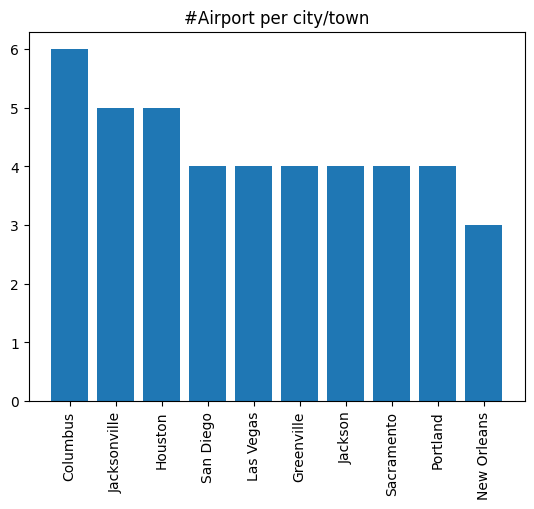

In [12]:
# check the city/towns that have the highest number of airports
municipality_dist = ML_US_airports_df['MUNICIPALITY'].value_counts()[:10]

# Create a bar plot
plt.bar(municipality_dist.index, municipality_dist.values)

# Add title
plt.title('#Airport per city/town')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

From the plots above we can see that 'Columbus' has the highest number of airports.

In [13]:
# check all of the airports in Columbus
ML_US_airports_df[ML_US_airports_df['MUNICIPALITY'] == 'Columbus']

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
48,medium_airport,Columbus Municipal Airport,656.0,NaN,US,Columbus,CLU,"-85.8963012695, 39.2619018555"
109,large_airport,Columbus Air Force Base,219.0,NaN,US,Columbus,CBM,"-88.44380187990001, 33.6437988281"
129,large_airport,John Glenn Columbus International Airport,815.0,NaN,US,Columbus,CMH,"-82.891899, 39.998001"
146,medium_airport,Columbus Metropolitan Airport,397.0,NaN,US,Columbus,CSG,"-84.93890380859375, 32.516300201416016"
367,large_airport,Rickenbacker International Airport,744.0,NaN,US,Columbus,LCK,"-82.927803, 39.813801"
509,medium_airport,The Ohio State University Airport - Don Scott ...,905.0,NaN,US,Columbus,OSU,"-83.072998, 40.0798"


## Tickets.csv

Let's explore the tickets dataset.

In [14]:
# take a look at the first 5 records in this dataset
Tickets_df.head()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.0,MQ,1.0,309.0,MGM


Our focus is on the Domestic US flights between medium/large airports, so as for the previous dataset, here we are also considering only tickets related to these airports.

In [15]:
# get the IATA code of the US medium/large airports
ML_US_codes = ML_US_airports_df['IATA_CODE']

# filter out the domestic US flights between medium and large airports
ML_US_domestic_ticks = Tickets_df[(Tickets_df['ORIGIN'].isin(ML_US_codes)) & (Tickets_df['DESTINATION'].isin(ML_US_codes))].copy()

# take a look at the data
ML_US_domestic_ticks

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.0,MQ,1.0,309.0,MGM
...,...,...,...,...,...,...,...,...,...,...,...,...
1167280,201911284909,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,244.0,ANC
1167281,201911284959,2019,1,YAK,US,AK,Alaska,1.0,AS,1.0,371.0,JNU
1167282,201911284940,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,271.0,JNU
1167283,201911284914,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,603.0,ANC


Moreover as our analysis is for the roundtrip flights, then we will only consider the tickets that have been purchased for roundtrips

In [16]:
# only consider the tickets that have been bought for a round trip
ML_US_domestic_roundTicks = ML_US_domestic_ticks[ML_US_domestic_ticks['ROUNDTRIP'] == 1].copy()
ML_US_domestic_roundTicks

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
10,201912723337,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,1647.0,JAX
...,...,...,...,...,...,...,...,...,...,...,...,...
1167275,201911284921,2019,1,YAK,US,AK,Alaska,1.0,AS,5.0,11.0,ANC
1167277,201911284924,2019,1,YAK,US,AK,Alaska,1.0,AS,3.0,489.0,ANC
1167279,201911284925,2019,1,YAK,US,AK,Alaska,1.0,AS,3.0,493.0,ANC
1167281,201911284959,2019,1,YAK,US,AK,Alaska,1.0,AS,1.0,371.0,JNU


We check how many records and features we have for this dataset

In [17]:
# taking a look at the number of the records and features in this dataset
data_shape = ML_US_domestic_roundTicks.shape

print('#records = ', data_shape[0])
print('#features = ', data_shape[1])

#records =  684208
#features =  12


We will remove any possible duplicated records from the dataset

In [18]:
# check how many records are duplicated in the dataset
print(f'There are {ML_US_domestic_roundTicks.duplicated().sum()} duplicated records')

There are 43314 duplicated records


Although there are some duplicated values in the dataset, we prefer to keep them in the data, as the dataset that we are working on is a sample of the tickets, then keeping them in the data will give us better idea about the price of flight tickets.

Then we will check if there is any missing values in the dataset or not

In [19]:
# taking a look if there is any missing values in the data
ML_US_domestic_roundTicks.isnull().sum()

,0
ITIN_ID,0
YEAR,0
QUARTER,0
ORIGIN,0
ORIGIN_COUNTRY,0
ORIGIN_STATE_ABR,0
ORIGIN_STATE_NM,0
ROUNDTRIP,0
REPORTING_CARRIER,0
PASSENGERS,1162


### Pre processing

In the upcoming analysis, the key features we will focus on are 'ORIGIN', 'DESTINATION', and 'ITIN_FARE' from the ticket data. While the first two columns have no missing values, the 'ITIN_FARE' column contains missing values. Additionally, our checks revealed that some entries in this column include an extra $ symbol. We will address this by converting the entries to valid float values and replacing the missing values with the average ticket price for the same route.

In [20]:
# this function given a string tries to remove the $ from the values
# and reach a valid float value
def price_to_float(x):
  try:
    x = float(x)
    return x
  except:

    # remove the dollar sign and also extra whitespaces from the string
    # and convert it to a float value
    x = x.replace('$', '').strip()
    return float(x)

# this function given a dataframe and the column that shows the ticket price
# will try to fill in the null values based on the average price of the tickets
# in the same direction
def fill_ITIN_Fare_flight_dir(df, column):

  # a copy of the original data
  df_copy = df.copy()

  # try to convert the price to a valid float value
  df_copy[column] = df[column].apply(price_to_float)

  # as the next step, we want to fill the price of the missing entries
  # but the average of the price of the other tickets in the same direction (with the same origin and the destination)

  # as the next step we want to calculate the average ticket price per each route
  route_avg_price = df_copy.groupby(['ORIGIN', 'DESTINATION'])['ITIN_FARE'].mean()

  # then we will replace the missing values with the mean of the flight tickets in that route
  df_copy['ITIN_FARE'] = df_copy.apply(lambda x: route_avg_price[x['ORIGIN'], x['DESTINATION']] if pd.isnull(x['ITIN_FARE']) else x['ITIN_FARE'], axis = 1)

  return df_copy

# this function given a dataframe and the column that shows the ticket price
# will try to fill in the null values based on the average price of the tickets
# in the same route
def fill_ITIN_Fare_flight_route(df, column):

  # a copy of the original data
  df_copy = df.copy()

  # try to conver the data to a valid float value
  df_copy[column] = df[column].apply(price_to_float)

  # as the next step, we want to fill the price of the missing entries
  # but the average of the price of the other tickets in the same route

  # add a new columns to the dataframe that shows the route of that flight
  df_copy['ROUTE'] = df_copy.apply(lambda x: ' - '.join(sorted([x['ORIGIN'].upper(), x['DESTINATION'].upper()])), axis = 1)

  # as the next step we want to calculate the average ticket price per each route
  route_avg_price = df_copy.groupby('ROUTE')['ITIN_FARE'].mean()

  # then we will replace the missing values with the mean of the flight tickets in that route
  df_copy['ITIN_FARE'] = df_copy.apply(lambda x: route_avg_price[x['ROUTE']] if pd.isnull(x['ITIN_FARE']) else x['ITIN_FARE'], axis = 1)

  return df_copy

# try to fill in the price for the tickets based on the price of other tickets in the same direction
Tickets_of_study = fill_ITIN_Fare_flight_dir(ML_US_domestic_roundTicks, 'ITIN_FARE')

# try to fill in the price for the tickets based on the price of the other tickets in the same route
Tickets_of_study = fill_ITIN_Fare_flight_route(Tickets_of_study, 'ITIN_FARE')

# if still there are some records that have missing values in ITIN_FARE
# drop them from our analaysis, as we cannot fill them with a meaningful value
# and in that case that would be arbitrary value
Tickets_of_study = Tickets_of_study.drop(Tickets_of_study[Tickets_of_study['ITIN_FARE'].isnull()].index)

# Then we will only consdier the interesting information from the tickets for us which are the following
Tickets_of_study_info = Tickets_of_study[['ORIGIN', 'DESTINATION', 'ROUTE', 'ITIN_FARE']]

Tickets_of_study_info

,ORIGIN,DESTINATION,ROUTE,ITIN_FARE
0,ABI,DAB,ABI - DAB,736.0
1,ABI,COS,ABI - COS,570.0
2,ABI,MCO,ABI - MCO,564.0
3,ABI,LGA,ABI - LGA,345.0
10,ABI,JAX,ABI - JAX,1647.0
...,...,...,...,...
1167275,YAK,ANC,ANC - YAK,11.0
1167277,YAK,ANC,ANC - YAK,489.0
1167279,YAK,ANC,ANC - YAK,493.0
1167281,YAK,JNU,JNU - YAK,371.0


We can see the type of the data that we are keeping for the rest of our analysis.

In [21]:
Tickets_of_study_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684202 entries, 0 to 1167284
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ORIGIN       684202 non-null  object 
 1   DESTINATION  684202 non-null  object 
 2   ROUTE        684202 non-null  object 
 3   ITIN_FARE    684202 non-null  float64
dtypes: float64(1), object(3)
memory usage: 26.1+ MB


## Flights.csv

Let's take a look at this dataset

In [22]:
# taking a look at the first 5 records
Flights_df.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


we are interested in the domestic US flights between the medium and large airports. Before we have identified those airports in the previous subsection. So here we will only filter our the flights between these airports.

Thus, we will only consider the flights that their 'ORIGIN' and 'DESTINATION' are one of those airports.

In [23]:
# get the IATA code of the US medium/large airports
ML_US_AC = ML_US_airports_df['IATA_CODE']

# filter out the domestic US flights between medium and large airports
ML_US_domestic_flights = Flights_df[(Flights_df['ORIGIN'].isin(ML_US_AC)) & (Flights_df['DESTINATION'].isin(ML_US_AC))].copy()

# take a look at the data
ML_US_domestic_flights

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.970000
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.550000
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.910000
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.670000
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915881,3/23/19,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.794884
1915882,3/24/19,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.0,-1.0,0.0,106,****,0.538399
1915883,3/25/19,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,-25.0,0.0,106,****,0.955579
1915884,3/26/19,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.595344


We check how many records and features we have for this dataset

In [24]:
# taking a look at the number of the records and features in this dataset
data_shape = ML_US_domestic_flights.shape

print('#records = ', data_shape[0])
print('#features = ', data_shape[1])

#records =  1883141
#features =  16


We will remove any possible duplicated records from the dataset

In [25]:
# check how many records are duplicated in the dataset
print(f'There are {ML_US_domestic_flights.duplicated().sum()} duplicated records')

print('-' * 30)
print('After dropping the duplicates: ')

# dropping the duplicated records from the dataset
ML_US_domestic_flights.drop_duplicates(inplace = True)

# get the shape of the data again
data_shape = ML_US_domestic_flights.shape

print('#records = ', data_shape[0])
print('#features = ', data_shape[1])

There are 4545 duplicated records
------------------------------
After dropping the duplicates: 
#records =  1878596
#features =  16


To check the consistency of the data, we will check if there is any record that has the same origin and destionation or not.

In [26]:
# select the records that their origin and destination is the same
ML_US_domestic_flights[ML_US_domestic_flights['ORIGIN'] == ML_US_domestic_flights['DESTINATION']]

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
1910837,3/2/19,WN,N7889A,3223,14635,RSW,"Fort Myers, FL",14635,RSW,"Fort Myers, FL",0.0,11.0,0.0,2,2323,0.698704


We can see that there is one record that has the same origin and destination. Clearly this is a wrong record cause it doesn't make sense that that a flight goes to itself, so we have to remove this record from our dataset.

In [27]:
# consider only the records that their origin and destination is different
ML_US_domestic_flights = ML_US_domestic_flights[~(ML_US_domestic_flights['ORIGIN'] == ML_US_domestic_flights['DESTINATION'])].copy().reset_index(drop = True)
ML_US_domestic_flights

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.970000
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.550000
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.910000
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.670000
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878590,3/23/19,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.794884
1878591,3/24/19,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.0,-1.0,0.0,106,****,0.538399
1878592,3/25/19,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,-25.0,0.0,106,****,0.955579
1878593,3/26/19,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.595344


Then we will check if there is any missing values in the dataset or not

In [28]:
# taking a look if there is any missing values in the data
ML_US_domestic_flights.isnull().sum()

,0
FL_DATE,0
OP_CARRIER,0
TAIL_NUM,11868
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0
ORIGIN_CITY_NAME,0
DEST_AIRPORT_ID,0
DESTINATION,0
DEST_CITY_NAME,0


We can clearly see that some of the columns have missing values

### Pre processing

Now we will apply our pre processing steps on the flights dataset. We will apply the following transformations to our data:

1. Only keeping the flights that their route exists in the ticket dataset
2. Filling the missing values in DEP_DELAY and ARR_DELAY by replacing them with 0.
3. Some of the values in the DISTANCE record are not valid float values, we will first replace them with nan and take care of them later.
4. Then we will replace the DISTANCE field for all of the flights based on the most common DISTANCE value within that flight direction

5. Filling the missing values in the OCCUPANCY_RATE by considering the occupancy rate of the flights in the same direction.

In [29]:
# this function given the flights and tickets dataframe
# will try to remove the records that their route and tickets are being missed
# in the tickets dataset, more over in our analysis we should consider the flights that
# are not canceled.
def flights_selection(flights_df, tickets_df):

  # take a copy from the original flight dataframe
  flight_df_copy = flights_df.copy()

  # select only the flights that are not canceled
  flight_df_copy = flight_df_copy[flight_df_copy['CANCELLED'] == 0 ]

  # first we will add a new column to the flights dataframe that shows the route of the flight
  flight_df_copy['ROUTE'] = flight_df_copy.apply(lambda x: ' - '.join(sorted([x['ORIGIN'].upper(), x['DESTINATION'].upper()])), axis = 1)

  # then we will select only the flights that their route
  # exists in the tickets dataframe
  flight_df_copy = flight_df_copy[flight_df_copy['ROUTE'].isin(tickets_df['ROUTE'])]

  return flight_df_copy


# this function given the dataframe will replace the missing values
# in the DEP_DELAY and ARR_DELAY  by the value
def delay_fill(df):

  # take a copy from the dataframe
  df_copy = df.copy()
  # replace the missing values in the DEP_DELAY by 0
  df_copy['DEP_DELAY'] = df_copy['DEP_DELAY'].fillna(0)

  # replace the missing values in the ARR_DELAY by 0
  df_copy['ARR_DELAY'] = df_copy['ARR_DELAY'].fillna(0)

  return df_copy

# this function tries to convert a value to float
# otherwise it will replace it to nan
def float_convert(x):

  # try to convert that distance to a float value
  try:
    # if that was doable, return the float version
    x = float(x)
    return x
  # othewise, that is not a valid float value, so replace by nan
  except:
    return np.nan

# this function given the dataframe, will try to put a value
# value for the values in the DISTANCE column
def distance_valid(df):

  # take a copy of the dataset
  df_copy = df.copy()

  # first we will put null in the reocrds that their
  # distance values are not valid float
  df_copy['DISTANCE'] = df_copy['DISTANCE'].apply(float_convert)

  # then we have to compute the most common distance
  # in the fligts in the same direction
  common_distance = df_copy.groupby(['ORIGIN', 'DESTINATION'])['DISTANCE'].apply(lambda x: x.mode().iloc[0])

  # then replace the missing values with the most common distance
  # within the flights in the same direction
  df_copy['DISTANCE'] = df_copy.apply(lambda x: common_distance[x['ORIGIN'], x['DESTINATION']], axis = 1)

  return df_copy


# this function given the flights dataframe
# will return the filled dataframe has filled the missing values in the occupancy rate
def occupancy_fill(df):

  # take a copy from the dataframe
  df_copy = df.copy()

  # computing the average occupancy rate per each flight direction
  flight_occupancy_avg = df_copy.groupby(['ORIGIN', 'DESTINATION'])['OCCUPANCY_RATE'].mean()

  # then replace the missed values with the average occupancy rate in those flights
  df_copy['OCCUPANCY_RATE'] = df_copy.apply(lambda x: flight_occupancy_avg[x['ORIGIN'], x['DESTINATION']] if pd.isnull(x['OCCUPANCY_RATE']) else x['OCCUPANCY_RATE'], axis = 1)

  return df_copy


# convert the date to be a datetime object
ML_US_domestic_flights['FL_DATE'] = pd.to_datetime(ML_US_domestic_flights['FL_DATE'], format = 'mixed')

# select only the flights that their route ticket exists
Flights_of_study = flights_selection(ML_US_domestic_flights, Tickets_of_study_info)

# make the distance value of the flights to a valid value
Flights_of_study = distance_valid(Flights_of_study)

# fill in the missing values in the occupancy columns
Flights_of_study = occupancy_fill(Flights_of_study)

# then we will select only the fields that are interesting for us
Flights_of_study_info = Flights_of_study[['FL_DATE', 'ORIGIN', 'DESTINATION', 'DEP_DELAY',
                                          'ARR_DELAY', 'OCCUPANCY_RATE', 'DISTANCE', 'ROUTE']]

Flights_of_study_info

,FL_DATE,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,OCCUPANCY_RATE,DISTANCE,ROUTE
0,2019-03-02,RSW,CLE,-8.0,-6.0,0.970000,1025.0,CLE - RSW
1,2019-03-02,RSW,CMH,1.0,5.0,0.550000,930.0,CMH - RSW
2,2019-03-02,RSW,CMH,0.0,4.0,0.910000,930.0,CMH - RSW
3,2019-03-02,RSW,CMH,11.0,14.0,0.670000,930.0,CMH - RSW
4,2019-03-02,RSW,DAL,0.0,-17.0,0.620000,1005.0,DAL - RSW
...,...,...,...,...,...,...,...,...
1878590,2019-03-23,TUL,CLT,-9.0,-6.0,0.794884,842.0,CLT - TUL
1878591,2019-03-24,TUL,CLT,-2.0,-1.0,0.538399,842.0,CLT - TUL
1878592,2019-03-25,TUL,CLT,-8.0,-25.0,0.955579,842.0,CLT - TUL
1878593,2019-03-26,TUL,CLT,-9.0,-6.0,0.595344,842.0,CLT - TUL


Now let's check the distribution of the values in DEP_DELAY, ARR_DELAY and DISTANCE to see if there are any outliers in the data or not.

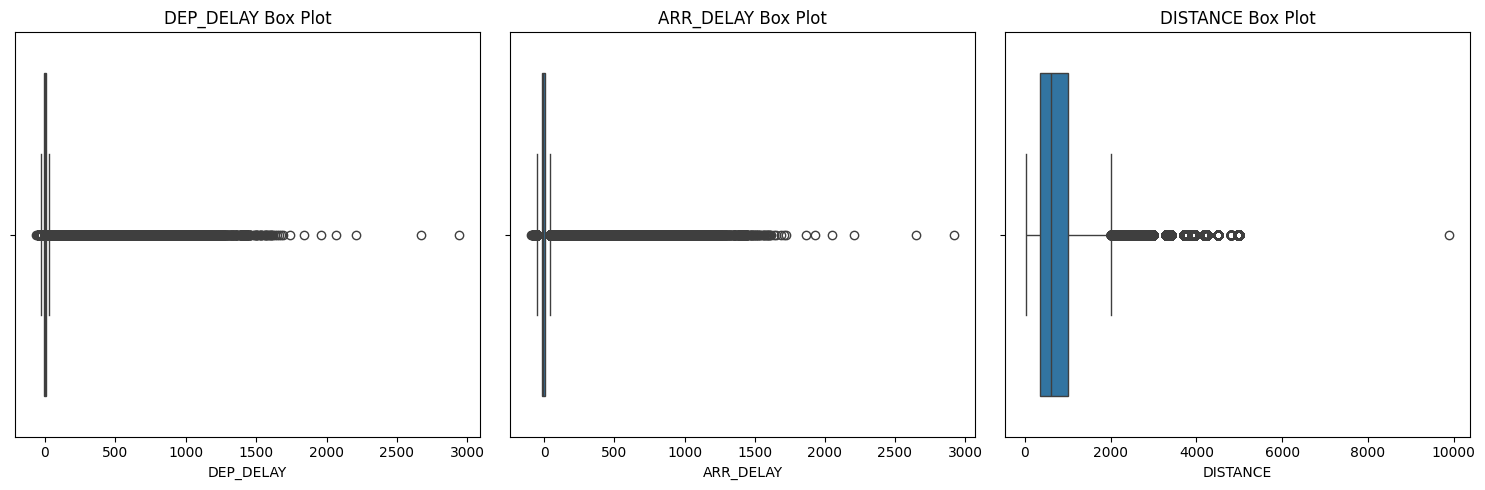

In [30]:
from math import ceil

# this function given a list of columns, will try to
# plot a box plot of them
def plot_BoxPlots(df, feature_list):

  # Create a subplots with two plots to plot the delays
  fig, axes = plt.subplots(1, len(feature_list), figsize=(15, 5))
  axes = axes.flatten()

  # try to plot each of the columns
  for idx, feature in enumerate(feature_list):

    # Create a box plot to visualize the outliers
    sns.boxplot(x=df[feature], ax = axes[idx])

    # Add titles for each subplot
    axes[idx].set_title(f'{feature} Box Plot')

  plt.tight_layout()
  # Display the plot
  plt.show()


# plot the departure and the arrival delays box plots
plot_BoxPlots(Flights_of_study_info, ['DEP_DELAY', 'ARR_DELAY', 'DISTANCE'])


We wil handle the outliers in these features with the following approaches:
1. DEP_DELAY and ARR_DELAY: we will replace the values that are above 1440 with 1440. We won't consider the delays that are above 24 hours.
2. There is only one value that is really far away from the rest of the population. So we will not consider that value in our process.

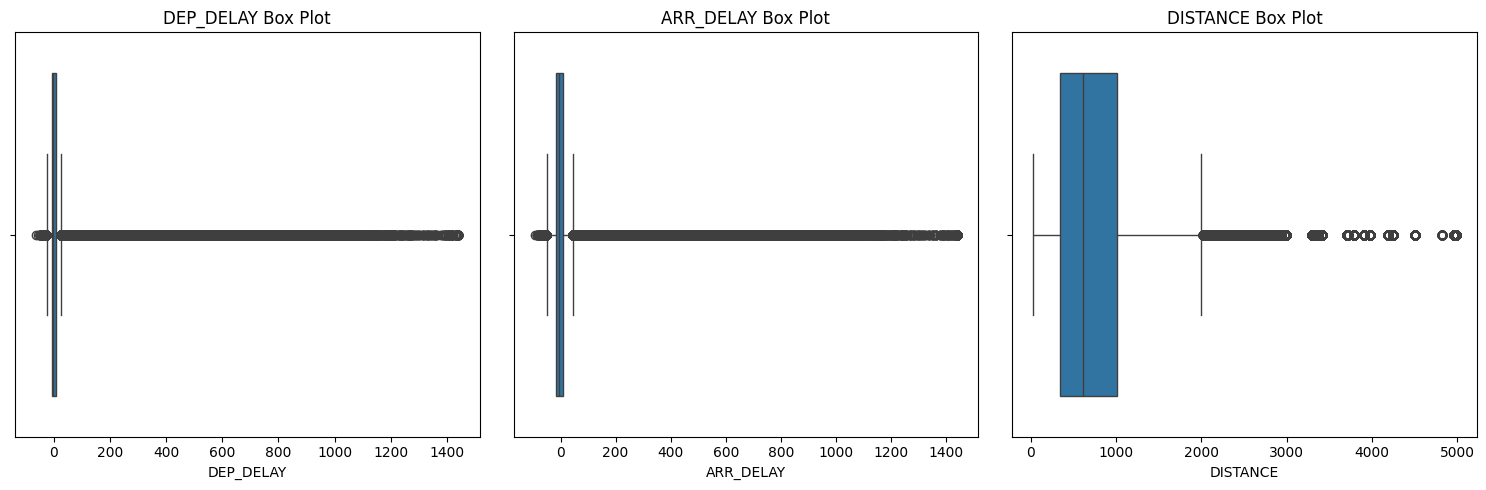

In [31]:
# this function given the dataframe, a column and a threshold
# will select the records that have a valud in that column that is less than that threshold
def filter_column_threshold(df, column, threshold):

  # take a copy from the original dataframe
  df_copy = df.copy()

  # select only the records that have a value on that column
  # that is lss than this threshold
  df_copy = df_copy[df_copy[column] < threshold]

  return df_copy

# this function given a dataframe, column and a value
# will replace all of the values that are above this value to this one
def replace_value(df, column, value):

  # take a copy of the dataframe
  df_copy = df.copy()

  # if the value on that column is greater than the passed value, replace it
  df_copy[column] = df_copy[column].apply(lambda x: x if x <= value else value)

  return df_copy

# get the winsorize dataframe for the departures
Flights_of_study_info = replace_value(Flights_of_study_info, 'DEP_DELAY', 1441)

# get the winsorize dataframe for the arrivals
Flights_of_study_info = replace_value(Flights_of_study_info, 'ARR_DELAY', 1441)

# get the winsorize dataframe for the distances
Flights_of_study_info = filter_column_threshold(Flights_of_study_info, 'DISTANCE', 6000)

# plot the departure and the arrival delays box plots
plot_BoxPlots(Flights_of_study_info, ['DEP_DELAY', 'ARR_DELAY', 'DISTANCE'])

We were able to handle the outliers to some extend. As there might be some different delays and flights with different distances then we keep these values as good values.

In [32]:
# taking a look at the number of the records and features in this dataset
data_shape = Flights_of_study_info.shape

print('#records = ', data_shape[0])
print('#features = ', data_shape[1])

#records =  1819691
#features =  8


Now let's see if the data at hand shows the flights for the 3 months:

In [33]:
print('Earliest flight date: ', Flights_of_study_info['FL_DATE'].min())
print('Latest flight date: ', Flights_of_study_info['FL_DATE'].max())

Earliest flight date:  2019-01-01 00:00:00
Latest flight date:  2019-03-31 00:00:00


We can see that in this dataset we have the flights between January 2019 and end of March 2019

As the last step we will check the type of data in each column

In [34]:
Flights_of_study_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1819691 entries, 0 to 1878594
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   FL_DATE         datetime64[ns]
 1   ORIGIN          object        
 2   DESTINATION     object        
 3   DEP_DELAY       float64       
 4   ARR_DELAY       float64       
 5   OCCUPANCY_RATE  float64       
 6   DISTANCE        float64       
 7   ROUTE           object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 124.9+ MB


In [35]:
Flights_of_study_info.isnull().sum()

,0
FL_DATE,0
ORIGIN,0
DESTINATION,0
DEP_DELAY,0
ARR_DELAY,0
OCCUPANCY_RATE,0
DISTANCE,0
ROUTE,0


# 10 Busiest round trips

In this section we are asked to report the 10 busiest round trips based on the number of the flights in those routes. We should also exclude the canceled flights from this analysis.

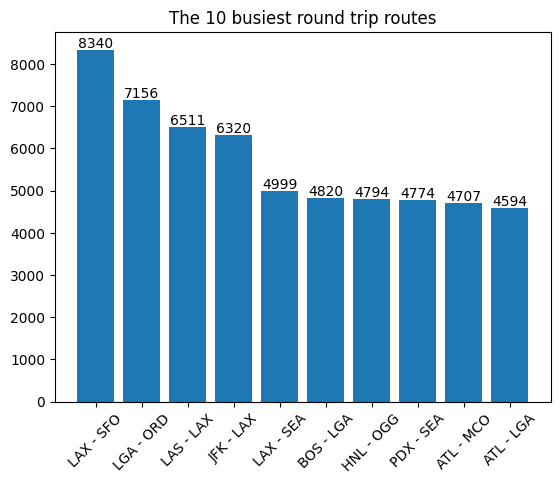

In [36]:
# this function given the dataframe containing the flights
# between the airports, will plot a bar plot that shows the 10 most busiest trip routes
def Top_10_Busiest_round_trips(df, top_n = 10):

  # check the number of the flights between each round trips
  route_flights_num = df['ROUTE'].value_counts()[:top_n]

  # Create a bar plot
  plt.bar(route_flights_num.index, route_flights_num.values)

  # put the value of each bar on top of the bar
  for index, value in enumerate(route_flights_num.values):
      plt.text(index, value + 50, str(value), ha='center')

  # Add title
  plt.title(f'The {top_n} busiest round trip routes')

  # Rotate the x-axis labels
  plt.xticks(rotation=45)

  # Show the plot
  plt.show()

# call the function to plot the most busiest trips
Top_10_Busiest_round_trips(Flights_of_study_info, 10)

# 10 most profitable round trip routes

In order to make our data prepared for our analysis we should consider some other information for each flights and routes. We will add the following columns to the tickets data that we are considering:

1. __DESTINATION_TYPE__: the type of the airport at the destination. This will be used later to see how much should be paid for the operational costs
2. __DEP_DELAY_ELGB__, __ARR_DELAY_ELGB__: the time of the delays that fine will be applied on.
3. __PASSENGERS__: the number of the passengers in the flight which is the multiplication of the occupancy rate by 200

In [37]:
# this function given the dataframe and a dataframe containing the
# IATA_CODE and the TYPE of the airports, will add the type of the
# airport at the destination
def destination_type(df, airport_df):

  # a copy of the dataframe
  df_copy = df.copy()

  # filter out only the airport type and the airport IATA code
  airport_df_filtered = airport_df[['TYPE', 'IATA_CODE']]

  # then we will join the other dataframe to this one to put the type of the airport
  df_copy = df_copy.merge(airport_df_filtered, left_on='DESTINATION', right_on='IATA_CODE')

  # drop the additional IATA_CODE
  df_copy.drop('IATA_CODE', axis = 1, inplace = True)

  # change the name of the column to show the type of the destination airport
  df_copy.rename(columns={'TYPE': 'DESTINATION_TYPE'}, inplace=True)

  return df_copy


# this function given the dataframe will put the time that
# is eligilbe for the fine about delays
def delay_fine(df):

  # a copy of the dataframe
  df_copy = df.copy()

  # compute the minutes that are eligible for the departure delays
  df_copy['DEP_DELAY_ELGB'] = df_copy['DEP_DELAY'].apply(lambda x: 0 if x <= 15 else x -15)

  # compute the minutes that are eligible for the arrival delays
  df_copy['ARR_DELAY_ELGB'] = df_copy['ARR_DELAY'].apply(lambda x: 0 if x <= 15 else x -15)

  return df_copy

# take a copy from the flights dataframe
Flights_profit_analysis = destination_type(Flights_of_study_info, ML_US_airports_df)

# add the eligible delays that a fine should be applied on it
Flights_profit_analysis = delay_fine(Flights_profit_analysis)

# then we can add the new column to the dataframe that shows
# the number of the passengers in each flight
Flights_profit_analysis['PASSENGERS'] = (Flights_profit_analysis['OCCUPANCY_RATE'] * 200).astype(int)

Flights_profit_analysis

,FL_DATE,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,OCCUPANCY_RATE,DISTANCE,ROUTE,DESTINATION_TYPE,DEP_DELAY_ELGB,ARR_DELAY_ELGB,PASSENGERS
0,2019-03-02,RSW,CLE,-8.0,-6.0,0.970000,1025.0,CLE - RSW,large_airport,0.0,0.0,194
1,2019-03-02,RSW,CMH,1.0,5.0,0.550000,930.0,CMH - RSW,large_airport,0.0,0.0,110
2,2019-03-02,RSW,CMH,0.0,4.0,0.910000,930.0,CMH - RSW,large_airport,0.0,0.0,182
3,2019-03-02,RSW,CMH,11.0,14.0,0.670000,930.0,CMH - RSW,large_airport,0.0,0.0,134
4,2019-03-02,RSW,DAL,0.0,-17.0,0.620000,1005.0,DAL - RSW,large_airport,0.0,0.0,124
...,...,...,...,...,...,...,...,...,...,...,...,...
1819686,2019-03-23,TUL,CLT,-9.0,-6.0,0.794884,842.0,CLT - TUL,large_airport,0.0,0.0,158
1819687,2019-03-24,TUL,CLT,-2.0,-1.0,0.538399,842.0,CLT - TUL,large_airport,0.0,0.0,107
1819688,2019-03-25,TUL,CLT,-8.0,-25.0,0.955579,842.0,CLT - TUL,large_airport,0.0,0.0,191
1819689,2019-03-26,TUL,CLT,-9.0,-6.0,0.595344,842.0,CLT - TUL,large_airport,0.0,0.0,119


## ROUTE info aggregate

In this section we are going to aggregated the information for each route based on the flights in each route.

In [38]:
# this function given a dataframe containing ROUTE information
# and the ticket dataframe will add the avarage ticket price
def route_ticket_price(route_df, ticket_df):

  # take a copy from the dataframe
  route_df_copy = route_df.copy()

  # compute the average ticket price for the tickets in the same route
  route_price = ticket_df.groupby('ROUTE')['ITIN_FARE'].mean()

  # add the average price to the route data information
  route_df['TICKET_PRICE'] = route_df.apply(lambda x: route_price[x['ROUTE']], axis = 1 ).round(2)

  return route_df

# create a new dataframe that includes the information per route
Route_info = Flights_profit_analysis.groupby('ROUTE').agg(TOTAL_MILES = ('DISTANCE', 'sum'),
                                                          FLIGHTS_NUM = ('ROUTE', 'size'),
                                                          MEDIUM_DEST_AIRPORT = ('DESTINATION_TYPE', lambda x: (x == 'medium_airport').sum()),
                                                          LARGE_DEST_AIRPORT = ('DESTINATION_TYPE', lambda x: (x == 'large_airport').sum()),
                                                          DEP_DELAY_ELGB = ('DEP_DELAY_ELGB', 'sum'),
                                                          ARR_DELAY_ELGB = ('ARR_DELAY_ELGB', 'sum'),
                                                          TOTAL_PASSENGERS = ('PASSENGERS', 'sum')).reset_index()

# add the average ticket price for each route
Route_info = route_ticket_price(Route_info, Tickets_of_study_info)
Route_info

,ROUTE,TOTAL_MILES,FLIGHTS_NUM,MEDIUM_DEST_AIRPORT,LARGE_DEST_AIRPORT,DEP_DELAY_ELGB,ARR_DELAY_ELGB,TOTAL_PASSENGERS,TICKET_PRICE
0,ABE - ATL,300328.0,434,217,217,3057.0,3478.0,56782,557.14
1,ABE - CLT,241462.0,502,251,251,2560.0,2690.0,66358,486.39
2,ABE - DTW,211225.0,497,249,248,6691.0,7909.0,64134,385.81
3,ABE - FLL,41640.0,40,20,20,228.0,274.0,4842,248.73
4,ABE - ORD,209280.0,320,161,159,9056.0,11580.0,41530,548.35
...,...,...,...,...,...,...,...,...,...
2788,STL - TPA,365849.0,421,0,421,3339.0,4254.0,55423,373.97
2789,STL - TUL,114075.0,325,0,325,1446.0,2717.0,42003,392.35
2790,SYR - TPA,79488.0,72,0,72,1497.0,1295.0,8861,308.51
2791,TPA - TTN,149935.0,157,79,78,2504.0,3719.0,20071,162.05


Below you can see the metadata about the columns:
1. __ROUTE__: the IATA codes for two airports in alphabetical order
2. __TOTAL_MILES__: the total distance traveled by all flights between these two airports.
3. __FLIGHTS_NUM__: the total number of the flights between these two airports (A->B and B->A)
4. __MEDIUM_DEST_AIRPORT__: the total number of the flights that the landing airport was a medium airport between these two airports.
5. __LARGE_DEST_AIRPORT__: the total number of the flights that the landing airport was a large airport between these two airports.
6. __DEP_DEALY_ELBG__: the total number of minutes to which the operational cost should be applied at the departure.
7. __ARR_DEALY_ELBG__: the total number of minutes to which the operational cost should be applied at the arrival.
8. __TOTAL_PASSENGERS__: the total number of the passengers in all of the flights between these two airports.
9. __TICKET_PRICE__: the average price of the tickets of the flights in that route








## ROUTE COST

In this subsection we will compute the total cost of the routes

In [39]:
# take the route column
Route_cost_df = pd.DataFrame(Route_info['ROUTE'])

# put also the number of the flights
Route_cost_df['FLIGHTS_NUM'] = Route_info['FLIGHTS_NUM']

# the cost for Fuel, Oil, Maintenance and Crew
Route_cost_df['FOMC_COST'] = Route_info['TOTAL_MILES'] * 8

# the cost for Depreciation, Insurance, Other
Route_cost_df['DIO_COST'] = Route_info['TOTAL_MILES'] * 1.18

# the cost for Airport operational costs
Route_cost_df['AIRPORT_OPT_COST'] = Route_info['MEDIUM_DEST_AIRPORT'] * 5000 + Route_info['LARGE_DEST_AIRPORT'] * 10000

# the cost for delays
Route_cost_df['DELAYS_OPT_COST'] = Route_info['DEP_DELAY_ELGB'] * 75 + Route_info['ARR_DELAY_ELGB'] * 75

# computing the total route cost
Route_cost_df['TOTAL_COST'] = Route_info.sum(numeric_only = True, axis = 1)

Route_cost_df = Route_cost_df.sort_values('ROUTE')

Route_cost_df

,ROUTE,FLIGHTS_NUM,FOMC_COST,DIO_COST,AIRPORT_OPT_COST,DELAYS_OPT_COST,TOTAL_COST
0,ABE - ATL,434,2402624.0,354387.04,3255000,490125.0,365070.14
1,ABE - CLT,502,1931696.0,284925.16,3765000,393750.0,314560.39
2,ABE - DTW,497,1689800.0,249245.50,3725000,1095000.0,291338.81
3,ABE - FLL,40,333120.0,49135.20,300000,37650.0,47312.73
4,ABE - ORD,320,1674240.0,246950.40,2395000,1547700.0,272634.35
...,...,...,...,...,...,...,...
2788,STL - TPA,421,2926792.0,431701.82,4210000,569475.0,430080.97
2789,STL - TUL,325,912600.0,134608.50,3250000,312225.0,161283.35
2790,SYR - TPA,72,635904.0,93795.84,720000,209400.0,91593.51
2791,TPA - TTN,157,1199480.0,176923.30,1175000,466725.0,176705.05


Below you can see the metadata about the columns:
1. __ROUTE__: the IATA codes for two airports in alphabetical order
3. __FLIGHTS_NUM__: the number of the flights in this route
4. __FOMC_COST__: the total cost for Fuel, Oil, Maintenance, Crew
5. __DIO_COST__: the total cost for Depreciation, Insurance, Other
6. __AIRPORT_OPT_COST__: the total Airport operational costs
7. __DELAYS_OPT_COST__: the total added operational costs due to the delays in departure and arrivals
8. __TOTAL_COST__: the sum of all of the costs for each route in this quarter.


## ROUTE REVENUE

In this subsection we will compute the total revenue of the routes

In [40]:
# take the route column
Route_revenue_df = pd.DataFrame(Route_info['ROUTE'])

# the total revenue for the Baggage fee
# as we are assuming that the 50% of the passengers will have one baggage, then we will
# consider the baggage fee for 50% of the total passengers overall
Route_revenue_df['BAGGAGE_FEE'] = Route_info['TOTAL_PASSENGERS'] * 0.5 * 35

# the total revenue achieved by selling the tickets to the passengers
Route_revenue_df['TICKET_FARE'] = Route_info['TOTAL_PASSENGERS'] * Route_info['TICKET_PRICE']

# add a column that shows the total revenue in that route
Route_revenue_df['TOTAL_REVENUE'] = Route_revenue_df['BAGGAGE_FEE'] + Route_revenue_df['TICKET_FARE']

# sort the records based on the route name
Route_revenue_df = Route_revenue_df.sort_values('ROUTE')

Route_revenue_df

,ROUTE,BAGGAGE_FEE,TICKET_FARE,TOTAL_REVENUE
0,ABE - ATL,993685.0,31635523.48,32629208.48
1,ABE - CLT,1161265.0,32275867.62,33437132.62
2,ABE - DTW,1122345.0,24743538.54,25865883.54
3,ABE - FLL,84735.0,1204350.66,1289085.66
4,ABE - ORD,726775.0,22772975.50,23499750.50
...,...,...,...,...
2788,STL - TPA,969902.5,20726539.31,21696441.81
2789,STL - TUL,735052.5,16479877.05,17214929.55
2790,SYR - TPA,155067.5,2733707.11,2888774.61
2791,TPA - TTN,351242.5,3252505.55,3603748.05


## ROUTE SUMMARY

In [41]:
# this dataframe will create the report about the total cost and revenue for each route
Route_summary = Route_cost_df.copy()
Route_summary = pd.concat([Route_summary, Route_revenue_df[Route_revenue_df.columns[1:]]], axis=1)

# then we will reorder to columns
all_columns = list(Route_summary.columns)
all_columns.remove('TOTAL_COST')
all_columns.remove('TOTAL_REVENUE')
Route_summary = Route_summary[all_columns + ['TOTAL_COST', 'TOTAL_REVENUE']]

Route_summary['NET_PROFIT'] = Route_summary['TOTAL_REVENUE'] - Route_summary['TOTAL_COST']
Route_summary

/tmp/ipython-input-41-24053767.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Route_summary['NET_PROFIT'] = Route_summary['TOTAL_REVENUE'] - Route_summary['TOTAL_COST']


,ROUTE,FLIGHTS_NUM,FOMC_COST,DIO_COST,AIRPORT_OPT_COST,DELAYS_OPT_COST,BAGGAGE_FEE,TICKET_FARE,TOTAL_COST,TOTAL_REVENUE,NET_PROFIT
0,ABE - ATL,434,2402624.0,354387.04,3255000,490125.0,993685.0,31635523.48,365070.14,32629208.48,32264138.34
1,ABE - CLT,502,1931696.0,284925.16,3765000,393750.0,1161265.0,32275867.62,314560.39,33437132.62,33122572.23
2,ABE - DTW,497,1689800.0,249245.50,3725000,1095000.0,1122345.0,24743538.54,291338.81,25865883.54,25574544.73
3,ABE - FLL,40,333120.0,49135.20,300000,37650.0,84735.0,1204350.66,47312.73,1289085.66,1241772.93
4,ABE - ORD,320,1674240.0,246950.40,2395000,1547700.0,726775.0,22772975.50,272634.35,23499750.50,23227116.15
...,...,...,...,...,...,...,...,...,...,...,...
2788,STL - TPA,421,2926792.0,431701.82,4210000,569475.0,969902.5,20726539.31,430080.97,21696441.81,21266360.84
2789,STL - TUL,325,912600.0,134608.50,3250000,312225.0,735052.5,16479877.05,161283.35,17214929.55,17053646.20
2790,SYR - TPA,72,635904.0,93795.84,720000,209400.0,155067.5,2733707.11,91593.51,2888774.61,2797181.10
2791,TPA - TTN,157,1199480.0,176923.30,1175000,466725.0,351242.5,3252505.55,176705.05,3603748.05,3427043.00


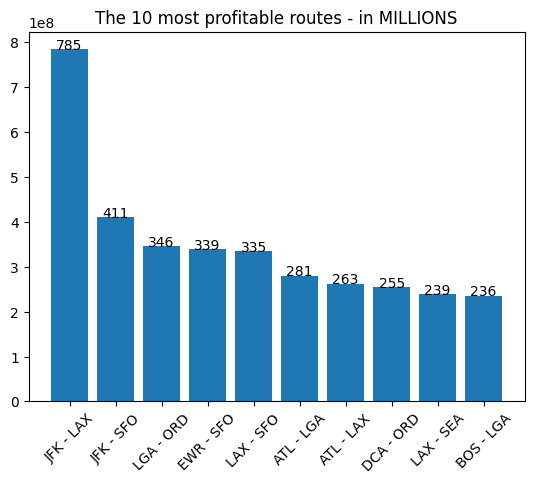

In [42]:
# this function given the summary of the routes will plot
# the top 10 routes based on the net profit
def Top_10_profitable_round_trips(df, top_n = 10, descending = True):

  # sorting the dataframe based on the net profit
  df_sorted = df.copy()
  df_sorted = df_sorted.sort_values('NET_PROFIT', ascending = not descending)[:10]

  # Create a bar plot
  plt.bar(df_sorted['ROUTE'], df_sorted['NET_PROFIT'])

  # put the value of each bar on top of the bar
  for index, value in enumerate(list(df_sorted['NET_PROFIT'])):
      plt.text(index, value, f'{ceil(value/10**6)}', ha='center')

  # Add title
  plt.title(f'The {top_n} {"most" if descending else "least"} profitable routes - in MILLIONS')

  # Rotate the x-axis labels
  plt.xticks(rotation=45)

  # Show the plot
  plt.show()

# call the function to plot the most busiest trips
Top_10_profitable_round_trips(Route_summary, 10)

3. Recommended route

# Top 5 recommended routes

To recommend the top 5 route we can consider the Return On Investment index which is the ratio between the net income (NET_POFIT) and that total investment (TOTAL_COST)

In [43]:
# Select some of the columns
Recommended_routes = Route_summary[['ROUTE', 'FLIGHTS_NUM', 'TOTAL_COST', 'TOTAL_REVENUE' , 'NET_PROFIT']].copy()

# creating a new columns showing the return on investment
Recommended_routes['ROI'] = Recommended_routes['NET_PROFIT'] / Recommended_routes['TOTAL_COST']

# sort the dataframe based on the ROI
Recommended_routes = Recommended_routes.sort_values('ROI', ascending = False).head().reset_index(drop = True )

print('\nThe top 5 routes to be recommended to invest in are the followings:  \n')
Recommended_routes


The top 5 routes to be recommended to invest in are the followings:  



,ROUTE,FLIGHTS_NUM,TOTAL_COST,TOTAL_REVENUE,NET_PROFIT,ROI
0,CLT - FLO,504,124248.00,1.318126e+08,1.316883e+08,1059.882714
1,SLC - TWF,582,196505.23,1.602053e+08,1.600088e+08,814.272304
2,PIH - SLC,540,161176.12,9.483354e+07,9.467236e+07,587.384562
3,MDT - PHL,794,182861.00,9.547768e+07,9.529482e+07,521.132538
4,CLT - GSP,1547,341392.33,1.478489e+08,1.475075e+08,432.076075


# Top 5 breakeven on upfront

For the recommended routes, we can check what is the expected profit per each flight in them. Then we can come up with the number of the round trip flights (2 flights) that are needed to breakeven on the upfront airplane cost.

In [44]:
# a copy of the recommended dataframe
BreakEven_df = Recommended_routes.copy()

# creating a new columns showing the return on investment
BreakEven_df['FLIGHT_EXP_PROFIT'] = BreakEven_df['NET_PROFIT'] / BreakEven_df['FLIGHTS_NUM']

# creating a new columns showing how many round trip flight we need to pay the
# upfront 90$ for the airplane
BreakEven_df['#FLIGHTS_to_BREAKEVEN'] = (90000000 / BreakEven_df['FLIGHT_EXP_PROFIT'])/ 2
BreakEven_df['#FLIGHTS_to_BREAKEVEN'] = BreakEven_df['#FLIGHTS_to_BREAKEVEN'].apply(lambda x: ceil(x))

# sort the dataframe based on the ROI
BreakEven_df = BreakEven_df.sort_values('FLIGHT_EXP_PROFIT', ascending = False)

BreakEven_df

,ROUTE,FLIGHTS_NUM,TOTAL_COST,TOTAL_REVENUE,NET_PROFIT,ROI,FLIGHT_EXP_PROFIT,#FLIGHTS_to_BREAKEVEN
1,SLC - TWF,582,196505.23,1.602053e+08,1.600088e+08,814.272304,274929.151942,164
0,CLT - FLO,504,124248.00,1.318126e+08,1.316883e+08,1059.882714,261286.324405,173
2,PIH - SLC,540,161176.12,9.483354e+07,9.467236e+07,587.384562,175319.193889,257
3,MDT - PHL,794,182861.00,9.547768e+07,9.529482e+07,521.132538,120018.661209,375
4,CLT - GSP,1547,341392.33,1.478489e+08,1.475075e+08,432.076075,95350.651526,472


#Final Recommendation

## 5 Round trips to recommend
- I chose ROI over breakeven time to pick the 5 round trip flights.

- ROI is good for long-term strategic planning, while breakeven cost focuses more on short-term needs to cover cost.

- ROI not only can help prioritize routes with higher potential for profitability, but also provides extra information for opportunity cost. It takes investment risk into affect, and can reflect risk-adjusted returns, which is really essential for investors when comes to investment and long-term profitbility. A route may have a little longer breakeven time but high ROI indicates indicates higher potential in profitbility in the long run, even if they take a bit longer to recover the upfront investment. This is especially important if the goal is to maximize profitability in the long term.



In [45]:
print('\nThe top 5 routes to be recommended to invest in are the followings:  \n')
Recommended_routes


The top 5 routes to be recommended to invest in are the followings:  



,ROUTE,FLIGHTS_NUM,TOTAL_COST,TOTAL_REVENUE,NET_PROFIT,ROI
0,CLT - FLO,504,124248.00,1.318126e+08,1.316883e+08,1059.882714
1,SLC - TWF,582,196505.23,1.602053e+08,1.600088e+08,814.272304
2,PIH - SLC,540,161176.12,9.483354e+07,9.467236e+07,587.384562
3,MDT - PHL,794,182861.00,9.547768e+07,9.529482e+07,521.132538
4,CLT - GSP,1547,341392.33,1.478489e+08,1.475075e+08,432.076075


## Key Performance Indicators (KPI’s) recommended tracking



We need to continue to track airplane features that are cost and revenue factors:
*   Flight Cancellation Ratio - the percentage of flight cancelled / total flights over a specific time, this indicates issue with certain route, and too much cancelation may generate extra cost
*   Delay time over time - long delays can decrease customer satisfaction, and we are airplanes that focuses on "on-time" so this is important
*   Arrival time - same as delay time, this is important for customer satisfaction and operational efficiency
*   Occupancy rate - a high occupancy rate is a good indicator that the flight is profitable, and we can adjust the ticket price based on occupancy rate as well
* Revenue per route
* Cost per route
* Competitor route - if we have the price, frequency of competitor information, this will give insights for pricing adjustment and demand for our routes



## Data Improvement Recommendation

- Tracking the tickets bougth and adding more features to consider. For example the number/id if the flight that ticket has been bought for.

- If we have a valid and consistent tickets data, we are able to accurately calculate the income of the round trips flights. For now we are working on the OCCUPANCY_RATE which doesn't capture if all of those population are indeed are on that flight, on a round trip flight.

- Also if we have customer information tracking in the ticket table, we are able to calculate the retention rate of customer, which can provide insights on customer satisfaction and whether we meet the needs of frequent travelers.




